In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


In [16]:
data_path = '"C:\\Users\\Neha\\OneDrive\\Desktop\\cost.csv"'
cost_data = pd.read_csv("C:\\Users\\Neha\\OneDrive\\Desktop\\cost.csv")
cost_data

,Task ID,Supplier ID,Cost
0,T34,S1,0.478219
1,T34,S2,0.444543
2,T34,S3,0.521679
3,T34,S4,0.307331
4,T34,S5,0.357689
...,...,...,...
7675,T130,S60,0.410605
7676,T130,S61,0.410376
7677,T130,S62,0.407884
7678,T130,S63,0.420536


In [4]:
# Step 1.1: Handling Missing Data
# Check for missing values
print("Missing values in each column:\n", cost_data.isnull().sum())

Missing values in each column:
 Task ID        0
Supplier ID    0
Cost           0
dtype: int64


In [5]:
# Step 1.2: Feature Selection and Scaling
scaler = StandardScaler()
cost_data['Cost'] = scaler.fit_transform(cost_data[['Cost']])

In [29]:
# Step 1.3: Identifying Top-Performing Suppliers for each task
top_10_suppliers_per_task = (
    cost_data.groupby('Task ID')
    .apply(lambda group: group.nsmallest(10, 'Cost'))
    .reset_index(drop=True)
)
top_10_suppliers_per_task

,Task ID,Supplier ID,Cost
0,T1,S18,0.355652
1,T1,S56,0.356349
2,T1,S47,0.357635
3,T1,S27,0.367182
4,T1,S34,0.367398
...,...,...,...
1195,T99,S59,0.440697
1196,T99,S40,0.440994
1197,T99,S53,0.441058
1198,T99,S39,0.445483


In [16]:
print("The filtered dataset contains only the top-performing suppliers.")

The filtered dataset contains only the top-performing suppliers.


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

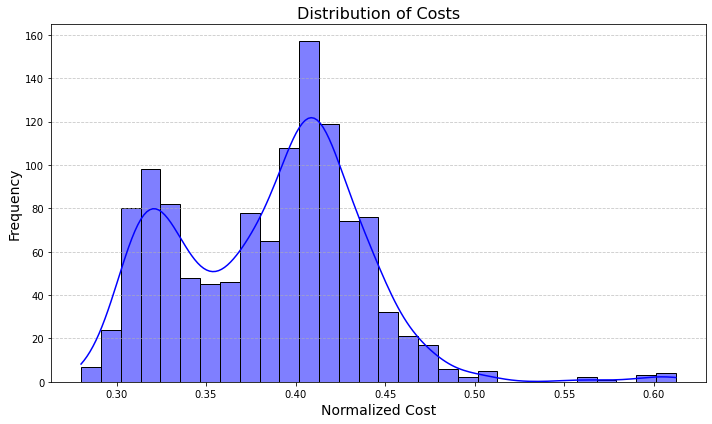

In [39]:
# Step 2.2: Analyze Cost Data for Patterns

# Distribution of Costs
plt.figure(figsize=(10, 6))
sns.histplot(top_10_suppliers_per_task['Cost'], kde=True, bins=30, color='blue')
plt.title('Distribution of Costs', fontsize=16)
plt.xlabel('Normalized Cost', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

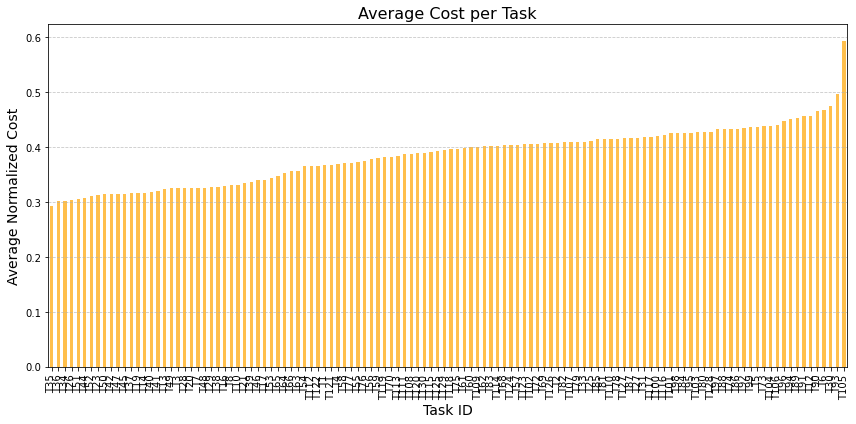

In [40]:
# Average Cost per Task
avg_cost_per_task = top_10_suppliers_per_task.groupby('Task ID')['Cost'].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_cost_per_task.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Average Cost per Task', fontsize=16)
plt.xlabel('Task ID', fontsize=14)
plt.ylabel('Average Normalized Cost', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

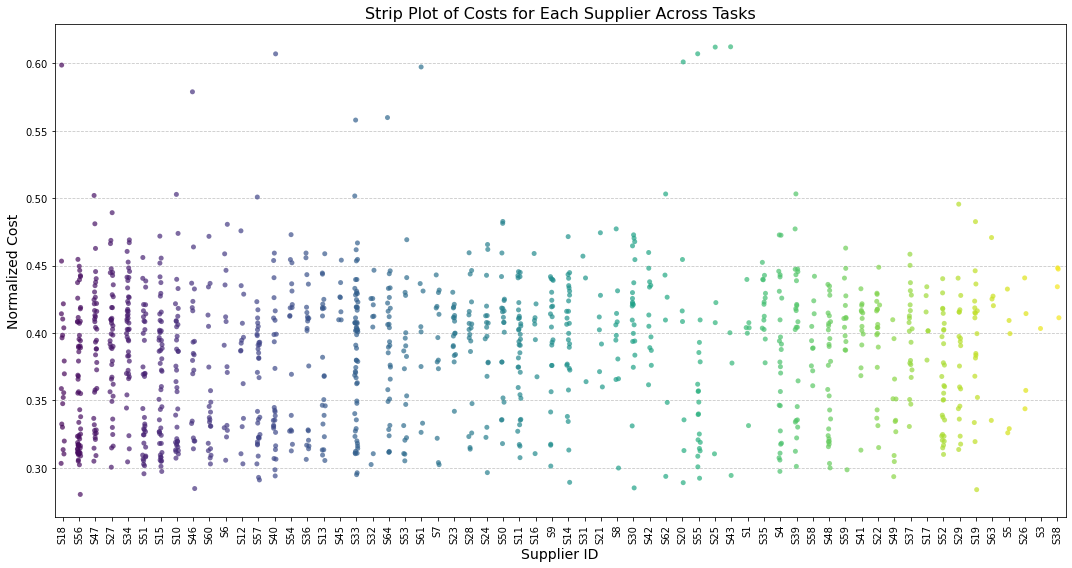

In [46]:
# Strip Plot of Costs for Each Supplier Across Tasks
plt.figure(figsize=(15, 8))
sns.stripplot(data=top_10_suppliers_per_task, x='Supplier ID', y='Cost', jitter=True, alpha=0.7, palette='viridis')
plt.title('Strip Plot of Costs for Each Supplier Across Tasks', fontsize=16)
plt.xlabel('Supplier ID', fontsize=14)
plt.ylabel('Normalized Cost', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()